<a href="https://colab.research.google.com/github/duttapratikcsc/NPTEL/blob/master/Image_Classification/FashionMNist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install tensorflow==2.0.0-beta1

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

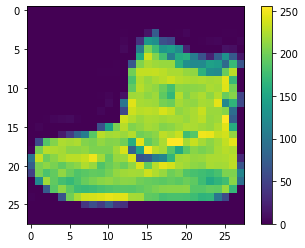

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0 

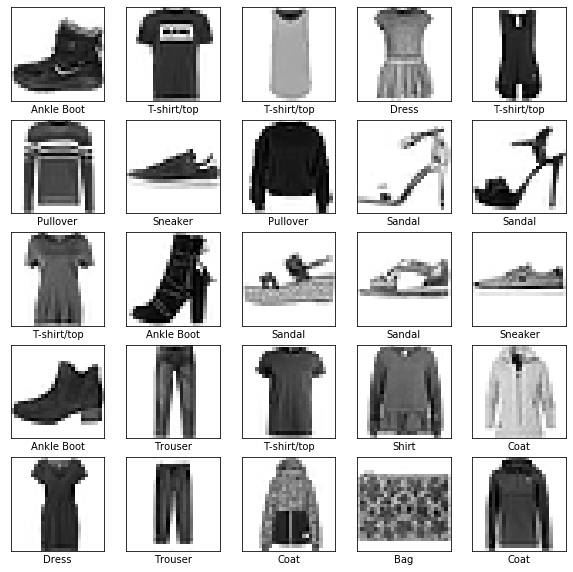

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')                  
])

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10, batch_size=32 )

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.1796 - accuracy: 0.9323
Epoch 2/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1646 - accuracy: 0.9381
Epoch 3/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1611 - accuracy: 0.9388
Epoch 4/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.1565 - accuracy: 0.9413
Epoch 5/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1537 - accuracy: 0.9417
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1515 - accuracy: 0.9430
Epoch 7/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1475 - accuracy: 0.9448
Epoch 8/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1438 - accuracy: 0.9462
Epoch 9/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1423 - accuracy: 0.9464
Epoch 10/10
60

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("\nTest accuracy:", test_acc)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.3412 - accuracy: 0.8967

Test accuracy: 0.8967


In [0]:
predictions = model.predict(test_images)
predictions[0]

array([6.2702320e-08, 1.2119328e-16, 9.8937107e-14, 3.5075043e-13,
       1.4496874e-14, 3.6263616e-06, 8.0506178e-11, 3.7187527e-04,
       2.2076201e-13, 9.9962437e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

In [0]:
def plot_image(i, prediction_array, true_label, img):
  prediction_array, true_label, img = prediction_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label = np.argmax(prediction_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(prediction_array),
                                       class_names[true_label]),
             color=color)
  
def plot_value_array(i, prediction_array, true_label):
  prediction_array, true_label = prediction_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), prediction_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(prediction_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  

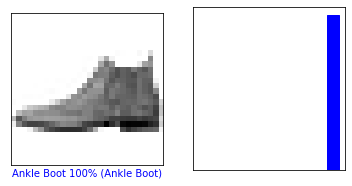

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

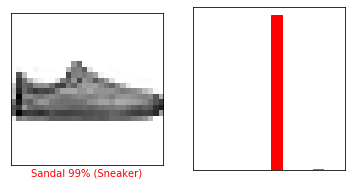

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

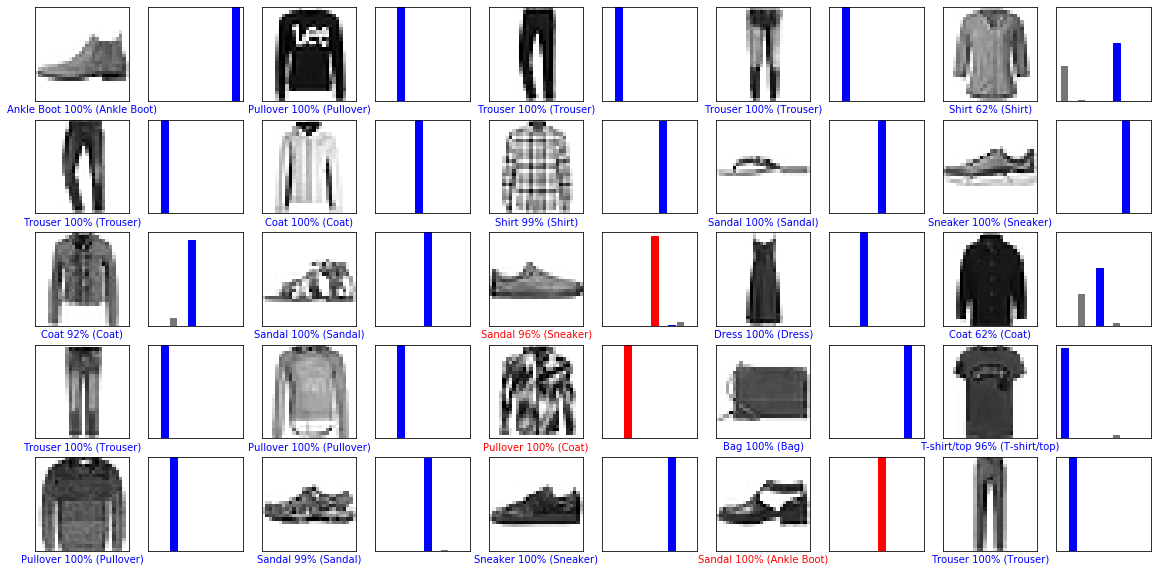

In [0]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [0]:
img = test_images[0]

print(img.shape)

(28, 28)


In [0]:
img = np.expand_dims(img,0)
print(img.shape)

(1, 28, 28)


In [0]:
prediction_single = model.predict(img)
prediction_single

array([[4.06224814e-08, 1.91384024e-16, 1.01171506e-13, 3.15263278e-13,
        1.78541535e-14, 2.64914979e-06, 1.00498519e-10, 2.83660193e-04,
        1.85184604e-13, 9.99713600e-01]], dtype=float32)

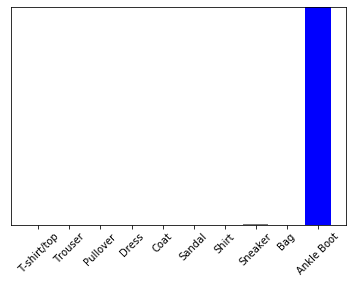

In [0]:
plot_value_array(0,prediction_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)